Niranjan Jangir B21CH021

Importing necessary libraries and reading data, same as previous question:

In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [2]:
train_data = loadmat(r"Training_Data_Four_Tanks.mat")
test_data = loadmat(r"Testing_Data_Four_Tanks.mat")

Reading the MATLAB data into pandas dataframe

In [3]:
train_input_data = pd.DataFrame(train_data['input_data'],columns = ['v1','v2'])  #input features
train_output_data = pd.DataFrame(train_data['output_data'],columns =['h1','h2']) #output features
train_time_span = pd.DataFrame(train_data['time_span'],columns=['time']) #time span
print(train_input_data.shape)
print(train_output_data.shape)

(90001, 2)
(90001, 2)


In [4]:
test_input_data = pd.DataFrame(test_data['input_data'],columns = ['v1','v2']) #input features
test_output_data = pd.DataFrame(test_data['output_data'],columns =['h1','h2']) #output features
test_time_span = pd.DataFrame(test_data['time_span'],columns=['time']) #time span
print(test_input_data.shape)
print(test_output_data.shape)

(60001, 2)
(60001, 2)


visualising the training input data

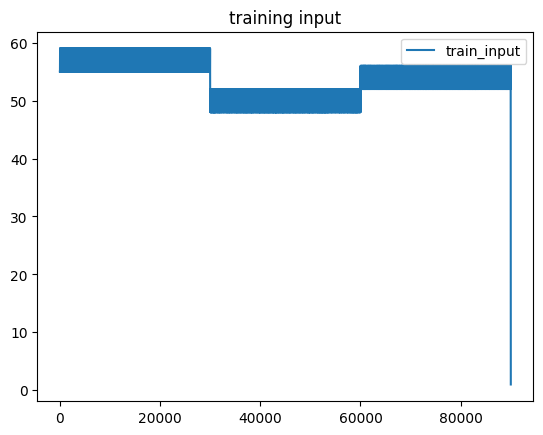

In [5]:
plt.plot(train_input_data['V1'], label = 'train_input')
plt.title("training input")
plt.legend()
plt.show()

Visualising the test input data

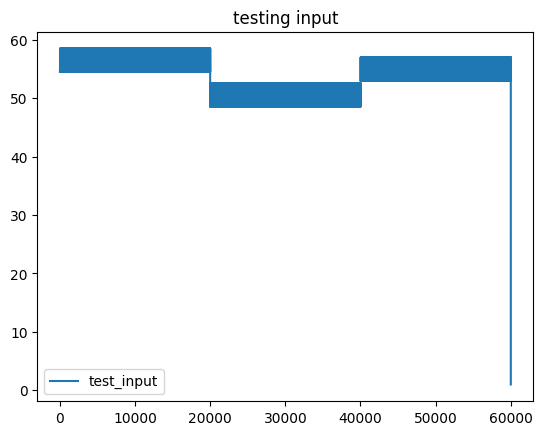

In [6]:
plt.plot(test_input_data['V1'], label = 'test_input')
plt.title("testing input")
plt.legend()
plt.show()

  1. As the last row int the input data was [1,1], so droping it from the datasets.
  2. Then Splitting the dataset into three parts as per the above visualization

In [7]:
#drop the last rows from training input, training output, testing input and testing output
train_input_data = train_input_data.drop(train_input_data.index[-1])
train_output_data = train_output_data.drop(train_output_data.index[-1])
test_input_data = test_input_data.drop(test_input_data.index[-1])
test_output_data = test_output_data.drop(test_output_data.index[-1])

#split the dataset into three parts
train_df_parts = np.array_split(train_input_data, 3)

#assign three different training inputs for their respective operating conditions
train_input_part1 = train_df_parts[0] #57 43
train_input_part2 = train_df_parts[1] #50 50
train_input_part3 = train_df_parts[2] #54 46

#printing the length of each part
print("Length of Part 1:", len(train_input_part1))
print("Length of Part 2:", len(train_input_part2))
print("Length of Part 3:", len(train_input_part3))

Length of Part 1: 30000
Length of Part 2: 30000
Length of Part 3: 30000


In [8]:
#Split the dataset into three parts
train_output_df_parts = np.array_split(train_output_data, 3)

#Assign three different training inputs for their respective operating conditions
train_output_part1 = train_output_df_parts[0] #57 43
train_output_part2 = train_output_df_parts[1] #50 50
train_output_part3 = train_output_df_parts[2] #54 46

#Printing the length of each part
print("Length of Part 1:", len(train_output_part1))
print("Length of Part 2:", len(train_output_part2))
print("Length of Part 3:", len(train_output_part3))

Length of Part 1: 30000
Length of Part 2: 30000
Length of Part 3: 30000


In [9]:
#Split the dataset into three parts
test_input_df_parts = np.array_split(test_input_data, 3)

#Assign three different training inputs for their respective operating conditions
test_intput_part1 = test_input_df_parts[0] #57 43
test_intput_part2 = test_input_df_parts[1] #50 50
test_intput_part3 = test_input_df_parts[2] #54 46

# Printing the length of each part
print("Length of Part 1:", len(test_intput_part1))
print("Length of Part 2:", len(test_intput_part2))
print("Length of Part 3:", len(test_intput_part3))

Length of Part 1: 20000
Length of Part 2: 20000
Length of Part 3: 20000


In [10]:
#Split the dataset into three parts
test_output_df_parts = np.array_split(test_output_data, 3)

#Assign three different training inputs for their respective operating conditions
test_output_part1 = test_output_df_parts[0] #57 43
test_output_part2 = test_output_df_parts[1] #50 50
test_output_part3 = test_output_df_parts[2] #54 46

# Printing the length of each part
print("Length of Part 1:", len(test_output_part1))
print("Length of Part 2:", len(test_output_part2))
print("Length of Part 3:", len(test_output_part3))

Length of Part 1: 20000
Length of Part 2: 20000
Length of Part 3: 20000


Implementaing three different RNN models for three different operating conditions and testing them on corresponding output.

In [11]:
def get_model_1(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(64, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(BatchNormalization())  # Add batch normalization layer
    model.add(Dropout(0.2))  # Add dropout layer to reduce overfitting
    model.add(Dense(32, activation='relu'))  # Add another hidden layer
    model.add(Dense(n_outputs)) #Add output layer
    model.compile(loss='mae', optimizer='adam')
    return model

# Define and compile the improved model
model_1 = get_model_1(train_input_part1.shape[1], train_output_part1.shape[1])

# Train the model
model_1.fit(train_input_part1, train_output_part1, verbose=1, epochs=50, validation_split=0.2)


Epoch 1/50
750/750 [==============================] - 3s 2ms/step - loss: 2.8451 - val_loss: 0.7585
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 0.9443 - val_loss: 0.3116
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 0.8858 - val_loss: 0.5695
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 0.8034 - val_loss: 0.2168
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.7070 - val_loss: 0.1683
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.6005 - val_loss: 0.3665
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4756 - val_loss: 0.2787
Epoch 8/50
750/750 [==============================] - 1s 2ms/step - loss: 0.3458 - val_loss: 0.1550
Epoch 9/50
750/750 [==============================] - 2s 2ms/step - loss: 0.2360 - val_loss: 0.0768
Epoch 10/50
750/750 [==============================] - 1s 2ms/step - loss: 0.1634 - val_loss: 0.0650

In [12]:
mae = model_1.evaluate(test_intput_part1, test_output_part1, verbose=1)

625/625 [==============================] - 1s 1ms/step - loss: 0.2233


In [13]:
print('>%.4f' % mae)

>0.2233


Such a low error refers that model is performing well for the given operating condition's test data

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

def get_model_2(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(64, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(BatchNormalization())  # Add batch normalization layer
    model.add(Dropout(0.2))  # Add dropout layer to reduce overfitting
    model.add(Dense(32, activation='relu'))  # Add another hidden layer
    model.add(Dense(n_outputs))
    model.compile(loss='mae', optimizer='adam')
    return model

# Define and compile the improved model
model_2 = get_model_2(train_input_part2.shape[1], train_output_part2.shape[1])

# Train the model
model_2.fit(train_input_part2, train_output_part2, verbose=1, epochs=50, validation_split=0.2)


Epoch 1/50
750/750 [==============================] - 3s 3ms/step - loss: 2.5821 - val_loss: 0.6677
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 1.0349 - val_loss: 0.1650
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 0.9319 - val_loss: 0.4744
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 0.8574 - val_loss: 0.1791
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.7411 - val_loss: 0.1881
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.6121 - val_loss: 0.1733
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4749 - val_loss: 0.3701
Epoch 8/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3678 - val_loss: 0.0658
Epoch 9/50
750/750 [==============================] - 2s 2ms/step - loss: 0.2682 - val_loss: 0.1258
Epoch 10/50
750/750 [==============================] - 2s 3ms/step - loss: 0.1796 - val_loss: 0.0382

In [15]:
mae = model_2.evaluate(test_intput_part2, test_output_part2, verbose=1)
print('>%.4f' % mae)
# the loss is : 0.1987

625/625 [==============================] - 1s 1ms/step - loss: 0.1987
>0.1987


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

def get_model_3(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(64, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(BatchNormalization())  # Add batch normalization layer
    model.add(Dropout(0.2))  # Add dropout layer to reduce overfitting
    model.add(Dense(32, activation='relu'))  # Add another hidden layer
    model.add(Dense(n_outputs))
    model.compile(loss='mae', optimizer='adam')
    return model

# Define and compile the improved model
model_3 = get_model_3(train_input_part3.shape[1], train_output_part3.shape[1])

# Train the model
model_3.fit(train_input_part3, train_output_part3, verbose=1, epochs=30, validation_split=0.2)


Epoch 1/30
750/750 [==============================] - 5s 5ms/step - loss: 2.6862 - val_loss: 0.2382
Epoch 2/30
750/750 [==============================] - 2s 3ms/step - loss: 0.8766 - val_loss: 0.2022
Epoch 3/30
750/750 [==============================] - 2s 2ms/step - loss: 0.7972 - val_loss: 0.1518
Epoch 4/30
750/750 [==============================] - 2s 2ms/step - loss: 0.7156 - val_loss: 0.1858
Epoch 5/30
750/750 [==============================] - 2s 2ms/step - loss: 0.6178 - val_loss: 0.0859
Epoch 6/30
750/750 [==============================] - 2s 2ms/step - loss: 0.4936 - val_loss: 0.1528
Epoch 7/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3267 - val_loss: 0.3692
Epoch 8/30
750/750 [==============================] - 2s 3ms/step - loss: 0.1687 - val_loss: 0.0488
Epoch 9/30
750/750 [==============================] - 2s 3ms/step - loss: 0.0942 - val_loss: 0.0333
Epoch 10/30
750/750 [==============================] - 2s 2ms/step - loss: 0.0827 - val_loss: 0.0308

In [17]:
mae = model_3.evaluate(test_intput_part3, test_output_part3, verbose=1)
print('>%.4f' % mae)
#epochs 50 : 1.9
#epochs 30 : 0.2544
#epochs 25 : 11.77

625/625 [==============================] - 1s 2ms/step - loss: 0.2611
>0.2611


For epochs = 50, the model for the third operating condition was facing overfitting. Hence, through furthur iterations, epochs = 30 is optimal for this operating conditions.

Inference based on if - else for a simple example:

In [24]:
# using row = [55,45], we get:
# prediction using lstm_model_1
# [[14.628049 15.286703]]

# using row = [48,52], we get:
# prediction using lstm_model_2
# [[16.387135 13.651885]]

# using
row = [53, 47]
# we get:
# Prediction using model_3:
# [[15.350609 14.587265]]

row_array = np.array(row).reshape(1, 2)

if 54 < row[0] <= 57:
    # Use model_1 for prediction
    prediction = model_1.predict(row_array)
    print("Prediction using model_1:")
    print(prediction)
elif row[0] <= 50:
    # Use model_2 for prediction
    prediction = model_2.predict(row_array)
    print("Prediction using model_2:")
    print(prediction)
elif 50 < row[0] <= 54:
    # Use model_3 for prediction
    prediction = model_3.predict(row_array)
    print("Prediction using model_3:")
    print(prediction)
else:
    print("Valve combination out of range.")


1/1 [==============================] - 0s 33ms/step
Prediction using model_3:
[[15.350609 14.587265]]


Inference based on if-else on randomely selected small input subdata:

In [25]:
from tensorflow.keras.models import load_model

# Iterate through each row of the input data
final_responses = []
output_data = []
random_sample = test_input_data.sample(n=100)
for index, row in random_sample.iterrows():
    # Extract the operating condition (V1) from the current row
    operating_condition = row['V1']

    # Reshape the row to match the input shape expected by the models
    input_data = np.array(row.values).reshape(1, 2)
    output_data_row = test_output_data.loc[index];
    output_data.append(output_data_row)
    # Choose the appropriate model based on the operating condition
    if (54<operating_condition<=57):
        model = model_1
    elif (operating_condition<=50):
        model = model_2
    elif(50< operating_condition <= 54):
        model = model_3
    else:
        # Handle cases where the operating condition does not match any condition
        continue

    # Make predictions using the selected model
    prediction = model.predict(input_data)

    # Append the predicted response to the final_responses list
    final_responses.append(prediction)


1/1 [==============================] - 0s 29ms/step


In [31]:
# print("h1"," ", "h2")
# print(output_data[0][0]," ", output_data[0][1])
def mean_absolute_error(a,b,c,d):
  mse1 = abs(c-a)/2
  mse2 = abs(d-b)/2
  return (mse1 + mse2)/4

mse = 0
i = 0;
for row in final_responses:
  mse+=(mean_absolute_error(row[0][0],row[0][1],output_data[0][0],output_data[0][1]));
  i+=1
print(mse/84)

0.280899690516453
